# 2023-09-05 · Inhibitory impulse response (PSP)

We've had excitatory (https://tfiers.github.io/phd/nb/2023-07-26__AdEx_Nto1_we_I_syn.html#impulse-response), \
but inh is interesting too: same syn strength, same PSP? Or no.

In [1]:
include("lib/Nto1.jl")

using Revise … ✔ (0.3 s)
using Units, Nto1AdEx, ConnectionTests, ConnTestEval … ✔ (0.1 s)
using StatsBase … ✔ (0.2 s)


In [2]:
N = 1
EI_ratio = 0  # i.e. all inh
duration = 150 * ms
wₑ = 14 * pS
wᵢ = 4 * wₑ
input = [[10*ms]]

@time sim = Nto1AdEx.sim(N, duration; input, EI_ratio, record_all=true, wᵢ);

  1.079201 seconds (1.74 M allocations: 113.662 MiB, 3.51% gc time, 99.87% compilation time)


In [129]:
sim.Nₑ

0

In [3]:
include("lib/plot.jl")

import PythonCall … ✔ (1.8 s)
import PythonPlot … ✔ (3.6 s)
using Sciplotlib … ✔ (0.5 s)
using PhDPlots … ✔


In [23]:
(; Eₑ, Eᵢ) = Nto1AdEx
(; gₑ, gᵢ, V, w) = sim.rec

Iₛ = @. gₑ*(V - Eₑ) + gᵢ*(V - Eᵢ);

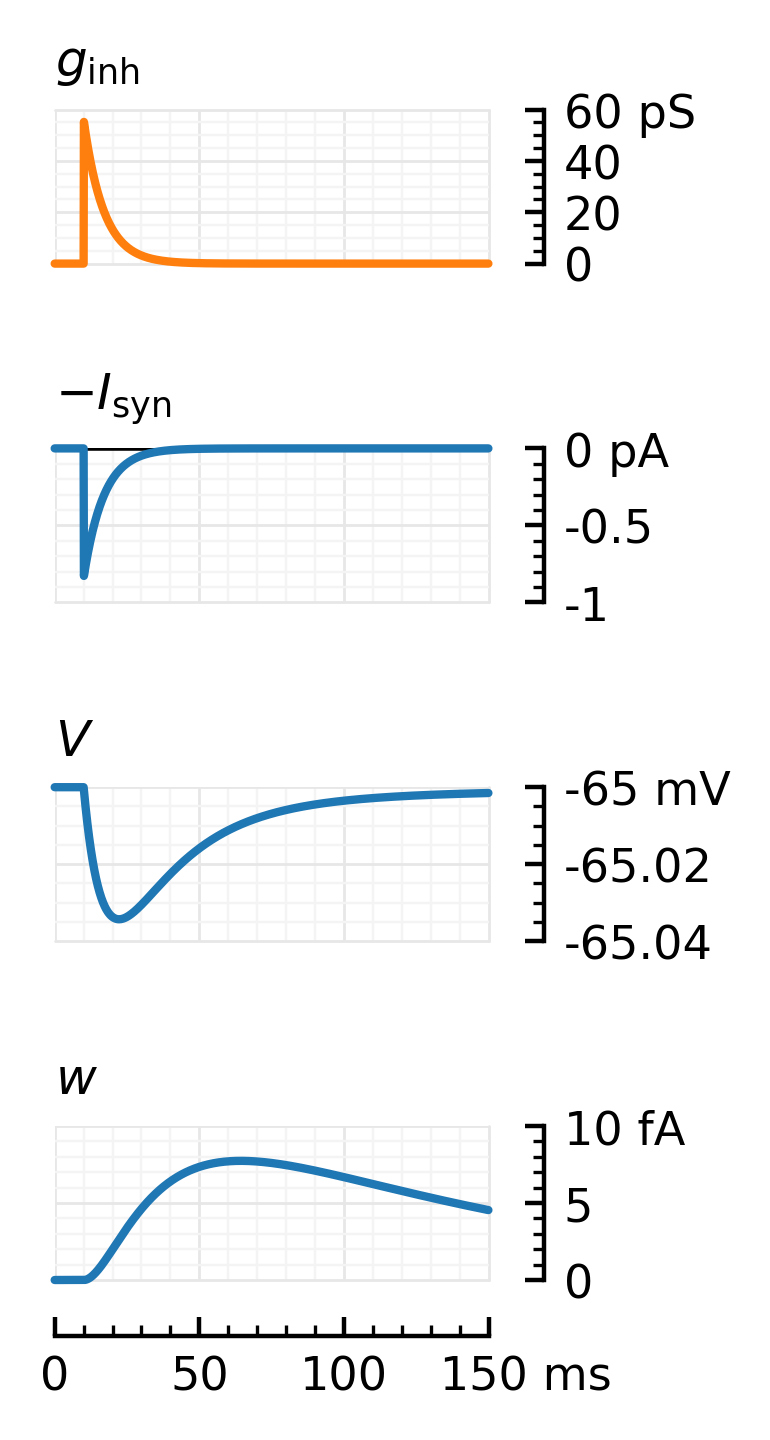

In [5]:
kw = (nbins_y=3, nbins_x=3, yaxloc=:right, clip_on=false, xunit=:ms, xlim=[0,duration]/ms)
figsize = (mw, 2.7*mw)
figsize = (1.4, 3.8)
fig, axs = plt.subplots(; figsize, nrows=4, sharex=true, dpi=400)
axs[1].axhline(c="black", lw=1)
plotsig(gᵢ, ms; hylabel=L"$g_\mathrm{inh}$", kw..., ax=axs[0], color=color_inh, yunit=:pS, ylim=[0, 60])
plotsig(-Iₛ, ms; hylabel=L"$-I_\mathrm{syn}$", kw..., ax=axs[1], yunit=:pA)
plotsig(V, ms; hylabel=L"$V$", kw..., ax=axs[2], yunit=:mV, ylim=[-65.04, -65])
plotsig(w, ms; hylabel=L"$w$", kw..., ax=axs[3], yunit=:fA, ylim=[0, 10])
axs[-1].set_xlabel(nothing)
for ax in axs[0:2]
    ax.set_xlabel(nothing)
    ax.spines["bottom"].set_visible(false)
    ax.tick_params(bottom=false, which="both")
end
plt.subplots_adjust(hspace=1.2);

In [6]:
# savefig_phd("impulse_response_inh", fig)

Just to check our code Nto1AdEx.jl haven't impacted original sim:

In [7]:
@time simm = Nto1AdEx.sim(6500, 10*minutes);

  1.649250 seconds (22.91 k allocations: 912.320 MiB, 2.21% gc time, 0.40% compilation time)


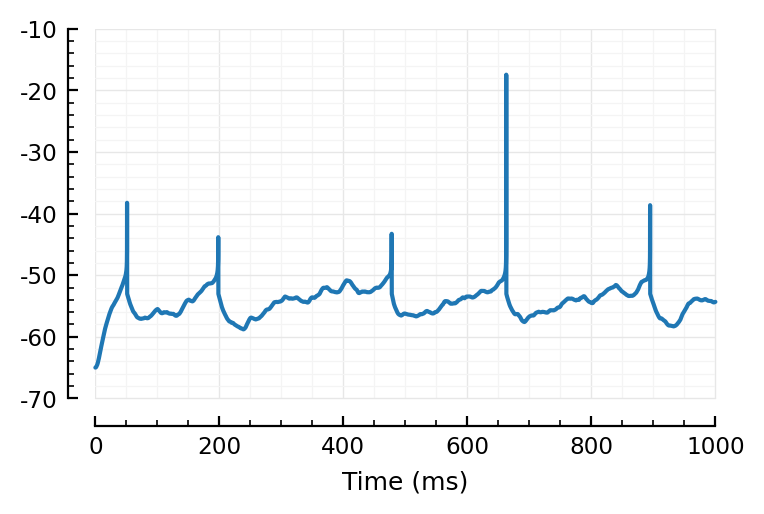

In [8]:
plotsig(simm.V / mV, [0, 1000], ms);

In [9]:
simm.spiketimes[1] / ms

51.2

All good.

---
Actually, let's get both PSP's in one plot.

more space efficient, and easy to compare.

## Both exc and inh PSPs 

In [20]:
simᵢ = sim;

In [13]:
@time simₑ = Nto1AdEx.sim(N, duration; input, EI_ratio=2, record_all=true, wₑ);

  0.000083 seconds (1.53 k allocations: 237.328 KiB)


In [18]:
simₑ.N, simₑ.Nₑ

(1, 1)

In [28]:
(; gₑ, gᵢ, V, w) = simₑ.rec

Iₛₑ = @. gₑ*(V - Eₑ) + gᵢ*(V - Eᵢ);

In [110]:
t_spike = input[1][1] / ms

10

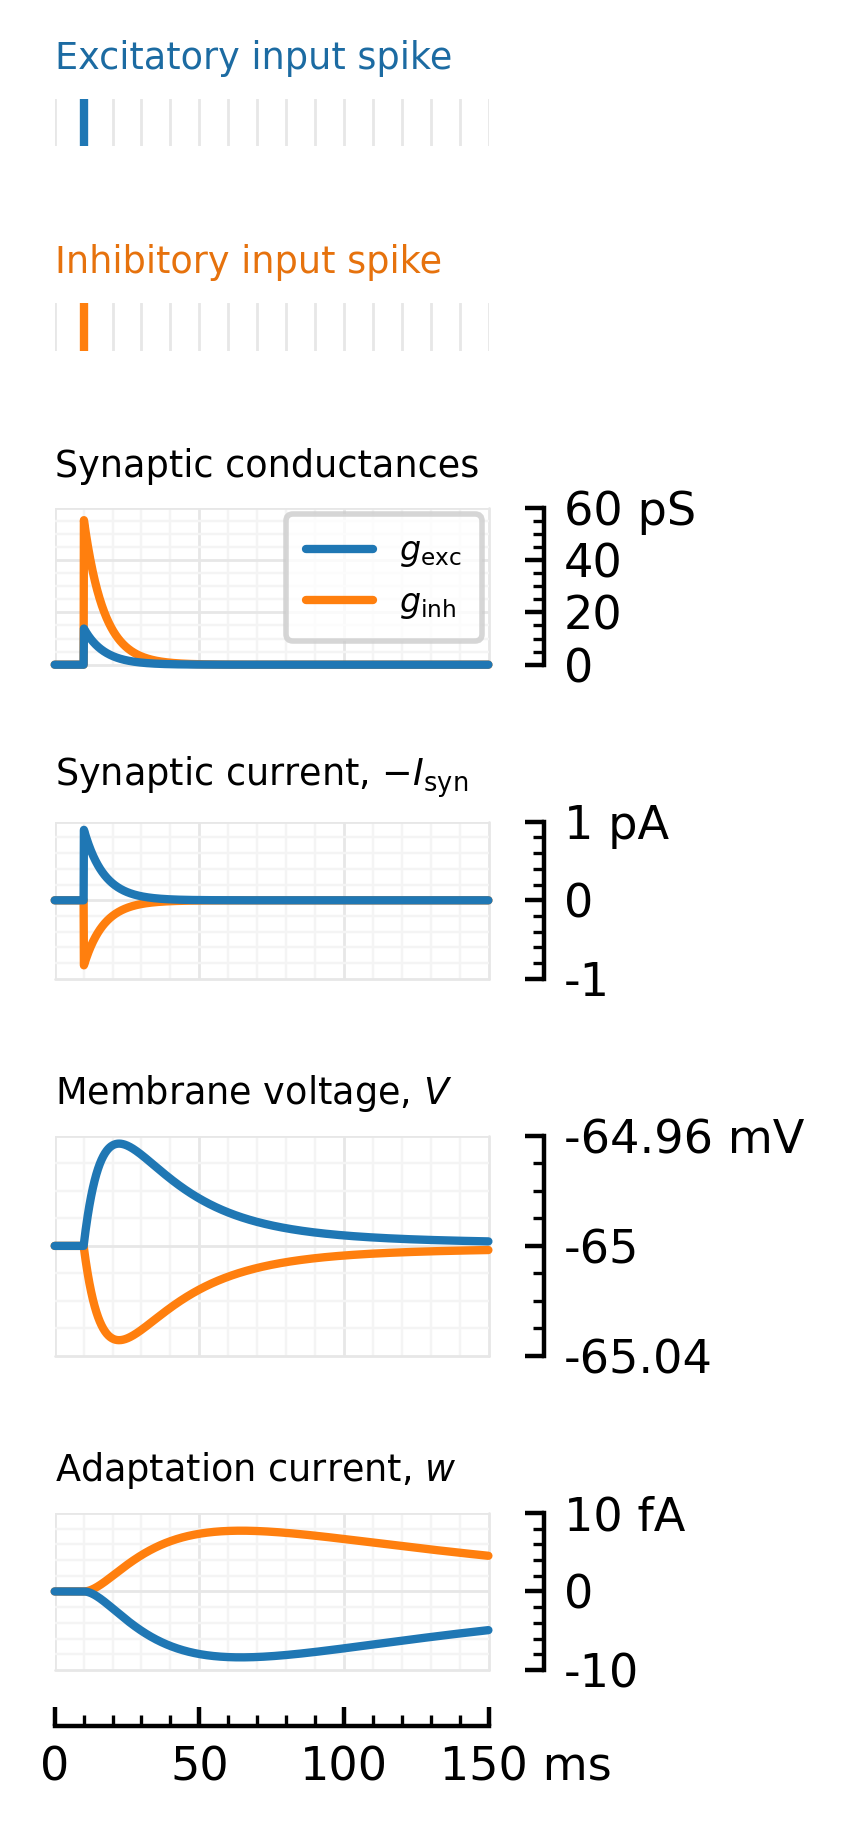

In [126]:
kw = (nbins_y=3, nbins_x=3, yaxloc=:right, clip_on=false, xunit=:ms, xlim=[0,duration]/ms)
# figsize = (mw, 2.7*mw)
figsize = (1.4, 5.1)
fig, axs = plt.subplots(; figsize, nrows=6, sharex=true, dpi=400, height_ratios=[0.3, 0.3, 1, 1, 1.4, 1])
ax1, ax2, ax_g, ax_I, ax_V, ax_w = axs
ax1.axvline(t_spike, color=as_mpl_type(color_exc))
ax2.axvline(t_spike, color=as_mpl_type(color_inh))
ax1.yaxis.set_visible(false)
ax2.yaxis.set_visible(false)
ax1.spines["left"].set_visible(false)
ax2.spines["left"].set_visible(false)
hylabel(ax1, "Excitatory input spike", fontsize=6.6, color=as_mpl_type(darken(color_exc, 0.9)))
hylabel(ax2, "Inhibitory input spike", fontsize=6.6, color=as_mpl_type(darken(color_inh, 0.9)))
hylabel(ax_g, "Synaptic conductances",                fontsize=6.6)
hylabel(ax_I, L"Synaptic current, $-I_\mathrm{syn}$", fontsize=6.6)
hylabel(ax_V, L"Membrane voltage, $V$",               fontsize=6.6)
hylabel(ax_w, L"Adaptation current, $w$",             fontsize=6.6)
V_y_kw = (ylim=[-65.04, -64.96], yticks=[-65.04, -65, -64.96])
# ax_I.axhline(c="black", lw=1)
plotsig(simᵢ.rec.gᵢ, ms; label=L"$g_\mathrm{inh}$", kw..., ax=ax_g, color=color_inh, yunit=:pS, ylim=[0, 60])
plotsig(simₑ.rec.gₑ, ms; label=L"$g_\mathrm{exc}$", kw..., ax=ax_g, color=color_exc, yunit=:pS, ylim=[0, 60])
plotsig(-Iₛ,        ms; kw..., ax=ax_I, yunit=:pA, color=color_inh, ylim=[-1,1])
plotsig(-Iₛₑ,       ms; kw..., ax=ax_I, yunit=:pA, color=color_exc, ylim=[-1,1])
plotsig(simᵢ.rec.V, ms; kw..., ax=ax_V, yunit=:mV, color=color_inh, V_y_kw...)
plotsig(simₑ.rec.V, ms; kw..., ax=ax_V, yunit=:mV, color=color_exc, V_y_kw...)
plotsig(simᵢ.rec.w, ms; kw..., ax=ax_w, yunit=:fA, color=color_inh, ylim=[-10, 10])
plotsig(simₑ.rec.w, ms; kw..., ax=ax_w, yunit=:fA, color=color_exc, ylim=[-10, 10])
axs[-1].set_xlabel(nothing)
for ax in axs[0:length(axs)-2]
    ax.set_xlabel(nothing)
    ax.spines["bottom"].set_visible(false)
    ax.tick_params(bottom=false, which="both")
end
legend(ax_g, fontsize=6, reverse=true)
plt.subplots_adjust(hspace=1.2);

In [127]:
savefig_phd("impulse_response", fig)

Saved at `../thesis/figs/impulse_response.pdf`